In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
from pydataset import data
import matplotlib.pyplot as plt

import env

In [2]:
# turn off warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
mpg = data('mpg')

In [4]:
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


In [5]:
mpg.groupby('manufacturer')['cty', 'hwy'].mean().sort_values(by='hwy')

,cty,hwy
manufacturer,,
land rover,11.500000,16.500000
lincoln,11.333333,17.000000
jeep,13.500000,17.625000
dodge,13.135135,17.945946
mercury,13.250000,18.000000
ford,14.000000,19.360000
chevrolet,15.000000,21.894737
nissan,18.076923,24.615385
toyota,18.529412,24.911765


In [6]:
mpg.manufacturer.nunique()

15

In [7]:
mpg.model.nunique()

38

In [8]:
mpg['transmission_type'] = mpg.trans.str[:-4]

In [9]:
mpg.groupby('transmission_type')['cty', 'hwy'].mean()

,cty,hwy
transmission_type,,
auto,15.968153,22.292994
manual,18.675325,25.779221


In [10]:
roles = pd.DataFrame({
    'id': [1, 2, 3, 4],
    'name': ['admin', 'author', 'reviewer', 'commenter']
})

users = pd.DataFrame({
    'id': [1, 2, 3, 4, 5, 6],
    'name': ['bob', 'joe', 'sally', 'adam', 'jane', 'mike'],
    'role_id': [1, 2, 3, 3, np.nan, np.nan]
})

In [11]:
users

,id,name,role_id
0,1,bob,1.0
1,2,joe,2.0
2,3,sally,3.0
3,4,adam,3.0
4,5,jane,NaN
5,6,mike,NaN


In [12]:
roles

,id,name
0,1,admin
1,2,author
2,3,reviewer
3,4,commenter


In [13]:
(users
 .set_index('role_id')
 .join(
     roles.rename(columns={'id': 'role_id'}).set_index('role_id'),
     rsuffix='_roles',
     how='outer'
 )
 .reset_index())

,role_id,id,name,name_roles
0,1.0,1.0,bob,admin
1,2.0,2.0,joe,author
2,3.0,3.0,sally,reviewer
3,3.0,4.0,adam,reviewer
4,4.0,NaN,NaN,commenter
5,NaN,5.0,jane,NaN
6,NaN,6.0,mike,NaN


In [14]:
def get_db_url(username, hostname, password, dbname) -> str:
    url = 'mysql+pymysql://{}:{}@{}/{}'
    return url.format(username, password, hostname, dbname)

In [15]:
def get_db_url(dbname) -> str:
    url = 'mysql+pymysql://{}:{}@{}/{}'
    return url.format(env.user, env.password, env.host, dbname)

In [16]:
employees_url = get_db_url('employees')

In [17]:
query = '''
SELECT *
FROM employees
LIMIT 20
'''

pd.read_sql(query, employees_url)

,emp_no,birth_date,first_name,last_name,gender,hire_date
0,10001,1953-09-02,Georgi,Facello,M,1986-06-26
1,10002,1964-06-02,Bezalel,Simmel,F,1985-11-21
2,10003,1959-12-03,Parto,Bamford,M,1986-08-28
3,10004,1954-05-01,Chirstian,Koblick,M,1986-12-01
4,10005,1955-01-21,Kyoichi,Maliniak,M,1989-09-12
5,10006,1953-04-20,Anneke,Preusig,F,1989-06-02
6,10007,1957-05-23,Tzvetan,Zielinski,F,1989-02-10
7,10008,1958-02-19,Saniya,Kalloufi,M,1994-09-15
8,10009,1952-04-19,Sumant,Peac,F,1985-02-18
9,10010,1963-06-01,Duangkaew,Piveteau,F,1989-08-24


In [18]:
query = '''
SELECT * FROM employees
'''

employees = pd.read_sql(query, employees_url)

In [19]:
query = '''
SELECT * FROM titles
'''

titles = pd.read_sql(query, employees_url)

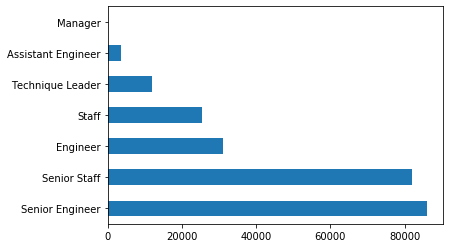

In [20]:
# WHERE to_date > NOW()
titles\
    [titles.to_date == titles.to_date.max()]\
    .title\
    .value_counts()\
    .plot.barh()

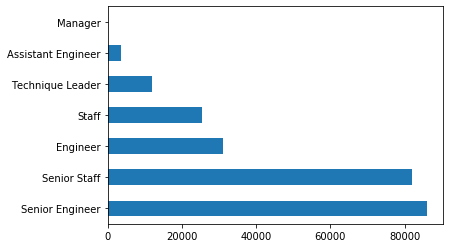

In [21]:
# WHERE to_date > NOW()
(titles
 [titles.to_date == titles.to_date.max()]
 .title
 .value_counts()
 .plot.barh())

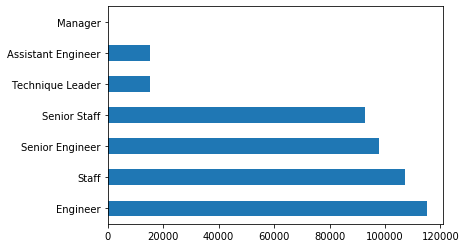

In [22]:
titles.title.value_counts().plot.barh()

In [23]:
df = employees.set_index('emp_no').join(titles.set_index('emp_no'))
df

,birth_date,first_name,last_name,gender,hire_date,title,from_date,to_date
emp_no,,,,,,,,
10001,1953-09-02,Georgi,Facello,M,1986-06-26,Senior Engineer,1986-06-26,9999-01-01
10002,1964-06-02,Bezalel,Simmel,F,1985-11-21,Staff,1996-08-03,9999-01-01
10003,1959-12-03,Parto,Bamford,M,1986-08-28,Senior Engineer,1995-12-03,9999-01-01
10004,1954-05-01,Chirstian,Koblick,M,1986-12-01,Engineer,1986-12-01,1995-12-01
10004,1954-05-01,Chirstian,Koblick,M,1986-12-01,Senior Engineer,1995-12-01,9999-01-01
...,...,...,...,...,...,...,...,...
499997,1961-08-03,Berhard,Lenart,M,1986-04-21,Engineer,1987-08-30,1992-08-29
499997,1961-08-03,Berhard,Lenart,M,1986-04-21,Senior Engineer,1992-08-29,9999-01-01
499998,1956-09-05,Patricia,Breugel,M,1993-10-13,Senior Staff,1998-12-27,9999-01-01


(array([0, 1, 2]), <a list of 3 Text xticklabel objects>)

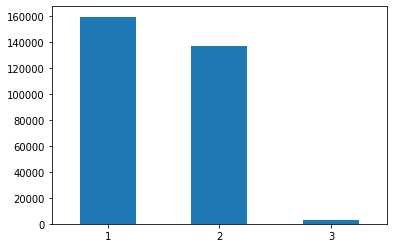

In [24]:
titles.groupby('emp_no').title.count().value_counts().plot.bar()
plt.xticks(rotation=0)

In [25]:
title_counts = titles.groupby('emp_no').title.count()
title_counts.value_counts()

1    159754
2    137256
3      3014
Name: title, dtype: int64

In [26]:
df = titles[titles.emp_no.isin(title_counts[title_counts > 1].index)]
df

,emp_no,title,from_date,to_date
3,10004,Engineer,1986-12-01,1995-12-01
4,10004,Senior Engineer,1995-12-01,9999-01-01
5,10005,Senior Staff,1996-09-12,9999-01-01
6,10005,Staff,1989-09-12,1996-09-12
8,10007,Senior Staff,1996-02-11,9999-01-01
...,...,...,...,...
443302,499996,Senior Engineer,2002-05-13,9999-01-01
443303,499997,Engineer,1987-08-30,1992-08-29
443304,499997,Senior Engineer,1992-08-29,9999-01-01
443305,499998,Senior Staff,1998-12-27,9999-01-01


In [27]:
title_counts.sort_values()

emp_no
10001     1
269516    1
269519    1
269521    1
269523    1
         ..
245911    3
246029    3
246056    3
92117     3
402226    3
Name: title, Length: 300024, dtype: int64

In [28]:
corrected_max_date = df[df.to_date != df.to_date.max()].to_date.max()
df['to_date_fixed'] = np.where(df.to_date == df.to_date.max(), corrected_max_date, df.to_date)
df

,emp_no,title,from_date,to_date,to_date_fixed
3,10004,Engineer,1986-12-01,1995-12-01,1995-12-01
4,10004,Senior Engineer,1995-12-01,9999-01-01,2002-08-01
5,10005,Senior Staff,1996-09-12,9999-01-01,2002-08-01
6,10005,Staff,1989-09-12,1996-09-12,1996-09-12
8,10007,Senior Staff,1996-02-11,9999-01-01,2002-08-01
...,...,...,...,...,...
443302,499996,Senior Engineer,2002-05-13,9999-01-01,2002-08-01
443303,499997,Engineer,1987-08-30,1992-08-29,1992-08-29
443304,499997,Senior Engineer,1992-08-29,9999-01-01,2002-08-01
443305,499998,Senior Staff,1998-12-27,9999-01-01,2002-08-01


In [29]:
avg_title_length_by_emp = (df
 .groupby('emp_no')
 .to_date_fixed
 .agg(lambda s: s.sort_values().diff().mean()))

In [30]:
df[df.emp_no == 92117].to_date_fixed.diff().mean()

Timedelta('1607 days 00:00:00')

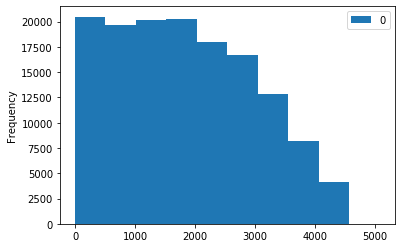

In [31]:
avg_title_length_by_emp.astype(str).str.extract(r'^(\d+)').astype(int).plot.hist()

In [34]:
# For each title, find the hire date of the employee that was hired
# most recently with that title.
(employees.set_index('emp_no')
 .join(titles.set_index('emp_no'))
 .groupby('title')
 .hire_date.max())

title
Assistant Engineer    1999-12-24
Engineer              2000-01-28
Manager               1992-02-05
Senior Engineer       2000-01-01
Senior Staff          2000-01-13
Staff                 2000-01-12
Technique Leader      1999-12-31
Name: hire_date, dtype: object

In [36]:
# Write the code necessary to create a cross tabulation of the number of titles
# by department. (Hint: this will involve a combination of SQL and python/pandas code)
query = '''
SELECT *
FROM titles t
JOIN dept_emp de USING(emp_no)
JOIN departments d USING(dept_no)
'''

df = pd.read_sql(query, employees_url)

In [38]:
pd.crosstab(df.dept_name, df.title)

title,Assistant Engineer,Engineer,Manager,Senior Engineer,Senior Staff,Staff,Technique Leader
dept_name,,,,,,,
Customer Service,298,2362,4,2027,13925,16150,309
Development,7769,58135,2,49326,1247,1424,7683
Finance,0,0,2,0,12139,13929,0
Human Resources,0,0,2,0,12274,14342,0
Marketing,0,0,2,0,13940,16196,0
Production,6445,49649,4,42205,1270,1478,6557
Quality Management,1831,13852,4,11864,0,0,1795
Research,378,2986,2,2570,11637,13495,393
Sales,0,0,2,0,36191,41808,0


In [61]:
query = '''
SELECT *
FROM orders
'''

orders = pd.read_sql(query, get_db_url('chipotle'))

In [62]:
orders

,id,order_id,quantity,item_name,choice_description,item_price
0,1,1,1,Chips and Fresh Tomato Salsa,nan,$2.39
1,2,1,1,Izze,[Clementine],$3.39
2,3,1,1,Nantucket Nectar,[Apple],$3.39
3,4,1,1,Chips and Tomatillo-Green Chili Salsa,nan,$2.39
4,5,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans, Rice, Cheese, Sour Cream]]",$16.98
...,...,...,...,...,...,...
4617,4618,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour Cream, Cheese, Lettuce, Guacamole]]",$11.75
4618,4619,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese, Lettuce, Guacamole]]",$11.75
4619,4620,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto Beans, Guacamole, Lettuce]]",$11.25
4620,4621,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettuce]]",$8.75


In [67]:
chicken_bowls = orders[orders.item_name == 'Chicken Bowl']
chicken_bowls.groupby('quantity').item_price.mean()

quantity
1     9.668139
2    18.823226
3    29.595000
Name: item_price, dtype: float64

In [50]:
# Most popular 3 items
orders.groupby('item_name').quantity.sum().nlargest(10)

item_name
Chicken Bowl                    761
Chicken Burrito                 591
Chips and Guacamole             506
Steak Burrito                   386
Canned Soft Drink               351
Chips                           230
Steak Bowl                      221
Bottled Water                   211
Chips and Fresh Tomato Salsa    130
Canned Soda                     126
Name: quantity, dtype: int64

In [53]:
orders.dtypes

id                     int64
order_id               int64
quantity               int64
item_name             object
choice_description    object
item_price            object
dtype: object

In [63]:
orders.item_price = orders.item_price.str.replace('$', '').astype(float)

In [64]:
# Items with the most revenue
orders.groupby('item_name').item_price.sum().nlargest(10)

item_name
Chicken Bowl           7342.73
Chicken Burrito        5575.82
Steak Burrito          3851.43
Steak Bowl             2260.19
Chips and Guacamole    2201.04
Chicken Salad Bowl     1228.75
Chicken Soft Tacos     1108.09
Veggie Burrito          934.77
Barbacoa Burrito        894.75
Veggie Bowl             867.99
Name: item_price, dtype: float64

In [46]:
# Does item price account for quantity? yes

In [71]:
# total price for each order
orders.groupby('order_id').item_price.sum().median()

16.2